In [1]:
import cv2
import json
from src.lib.utils.pnp.cuboid_pnp_shell import pnp_shell
import matplotlib.pyplot as plt
import numpy as np
from src.lib.opts import opts
from itertools import permutations
import copy
import math
from pprint import pprint
import pickle

In [2]:
opt = opts()
opt.nms = True
opt.obj_scale = True
opt.c = "cereal_box" # category

print(opt.nms, opt.obj_scale)

True True


In [3]:
# Take GT as imput:
with open('data/synthetic_data/test/anno.json', 'r') as f:
    data = json.load(f)

/tmp/ipykernel_53445/50717765.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,4,i+1)
/tmp/ipykernel_53445/50717765.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(p[0], p[1], cmap='b')


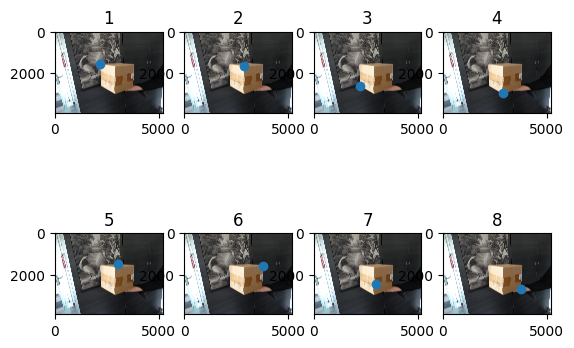

In [4]:
# first test with GT cereal:
img_gt = data[50]
size = img_gt["whd"]
points = img_gt["projection"]

img = plt.imread("data/synthetic_data/test/50.jpg")

plt.imshow(img)

for i, p in enumerate(points[:8]):
     plt.subplot(2,4,i+1)
     plt.imshow(img)
     plt.scatter(p[0], p[1], cmap='b')
     plt.title(f"{i+1}")
plt.show()

In [102]:
# camera=np.array([[663.0287679036459, 0, 300.2775065104167], [0, 663.0287679036459, 395.00066121419275], [0, 0, 1]])
# camera=np.array([[3648, 0, 2736], [0, 3648, 1824], [0, 0, 1]], dtype=np.float32)
with open('cameraMatrix.pkl', 'rb') as f:
            data = pickle.load(f)
camera = data
# camera=np.array([[1500, 0, 2592], [0, 1500, 1944], [0, 0, 1]], dtype=np.float32)

print(camera)

[[3.67253815e+03 0.00000000e+00 2.51466465e+03]
 [0.00000000e+00 3.79219835e+03 1.88693480e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


In [103]:
size = [x/size[1] for x in size]
print(size)
print(points)

bbox = {'kps': points, "obj_scale": size}
meta = {"width": img.shape[1],"height": img.shape[0], "camera_matrix": camera}

[0.9761904761904762, 1.0, 1.0238095238095237]
[[2192, 1544], [2872, 1648], [2224, 2620], [2880, 2960], [3020, 1476], [3776, 1552], [3016, 2436], [3740, 2696], [2960, 2116]]


In [104]:
projected_points, point_3d_cam, scale, points_ori, bbox = pnp_shell(opt, meta, bbox, points, size, OPENCV_RETURN=False)

Translation vector:  [[-0.00252441]
 [ 0.08056663]
 [-0.43822346]]


TypeError: cannot unpack non-iterable NoneType object

[2407.6935143  -242.58779078]
[ 258.24810612 3364.62326058]
[2228.04858069 5532.7697046 ]
[512.94129771 127.43826713]
[5265.75412759 3615.25516392]
[2594.46487463 2555.74510695]
[5131.91131391   95.95660538]
[2626.48992451 1253.30169625]


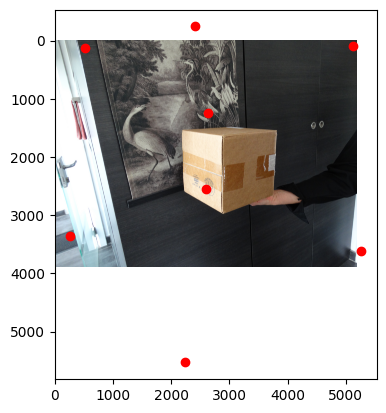

In [101]:
# pprint(bbox)

plt.imshow(img)
for p in bbox["projected_cuboid"]:
     print(p)
     plt.plot(int(p[0]),int(p[1]), 'ro')
plt.show()